In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.constants import golden
import statsmodels.api as sm

plt.style.use('fivethirtyeight')
plt.rc('figure', figsize=(5.0, 5.0/golden))

heroes = pd.read_csv('../heroes.csv', sep = ';', index_col=0)
heroes_with_year = heroes[heroes['First appearance'] < 2020]

heroes_with_year

,Identity,Birth place,Publisher,Height,Weight,Gender,First appearance,Eye color,Hair color,Strength,Intelligence
Name,,,,,,,,,,,
A-Bomb,Richard Milhouse Jones,"Scarsdale, Arizona",Marvel Comics,203.21,441.95,M,2008.0,Yellow,No Hair,100.0,moderate
Agent Bob,Bob,NaN,Marvel Comics,178.25,81.45,M,2007.0,Brown,Brown,10.0,low
Abe Sapien,Abraham Sapien,NaN,Dark Horse Comics,191.24,65.35,M,1993.0,Blue,No Hair,30.0,high
Abin Sur,NaN,Ungara,DC Comics,185.52,90.90,M,1959.0,Blue,No Hair,90.0,average
Animal Man,Bernhard Baker,NaN,DC Comics,183.80,83.39,M,1965.0,Blue,Blond,50.0,average
...,...,...,...,...,...,...,...,...,...,...,...
Alfred Pennyworth,Alfred Thaddeus Crane Pennyworth,NaN,DC Comics,178.26,72.98,M,1943.0,Blue,Black,10.0,good
Alan Scott,Alan Ladd Wellington Scott,Gotham City,DC Comics,180.98,90.81,M,1940.0,Blue,Blond,80.0,good
Amazo,NaN,NaN,DC Comics,257.49,173.95,M,1960.0,Red,NaN,100.0,good


In [3]:
#visualizzazione delle frequenze assolute
heroes_with_year['Publisher'].value_counts()

Marvel Comics        205
DC Comics            121
Dark Horse Comics     12
George Lucas          11
ABC Studios            4
Image Comics           3
Rebellion              1
Star Trek              1
Universal Studios      1
Hanna-Barbera          1
Name: Publisher, dtype: int64

In [6]:
#visualizzazione della tabella delle frequenze assolute
#crosstab permette di ottenere delle tabelle più ricche
publisher_freq = pd.crosstab(index = heroes_with_year['Publisher'], 
                             columns = ['Abs frequence'], 
                             colnames = [''])
publisher_freq  # è un dataframe

,Abs frequence
Publisher,
ABC Studios,4
DC Comics,121
Dark Horse Comics,12
George Lucas,11
Hanna-Barbera,1
Image Comics,3
Marvel Comics,205
Rebellion,1
Star Trek,1


In [9]:
#visualizzazione della tabella delle frequenze relative
publisher_rel_freq = pd.crosstab(index = heroes_with_year['Publisher'], 
                             columns = ['Abs frequence'], 
                             colnames = [''],
                            normalize = True) # è l'argomento che serve
publisher_rel_freq

,Abs frequence
Publisher,
ABC Studios,0.011111
DC Comics,0.336111
Dark Horse Comics,0.033333
George Lucas,0.030556
Hanna-Barbera,0.002778
Image Comics,0.008333
Marvel Comics,0.569444
Rebellion,0.002778
Star Trek,0.002778


In [10]:
#visualizzazione migliore con percentuali
(publisher_rel_freq.apply(lambda p: np.round(100*p, 2))
.astype(str)
.apply(lambda s: s + '%'))

,Abs frequence
Publisher,
ABC Studios,1.11%
DC Comics,33.61%
Dark Horse Comics,3.33%
George Lucas,3.06%
Hanna-Barbera,0.28%
Image Comics,0.83%
Marvel Comics,56.94%
Rebellion,0.28%
Star Trek,0.28%


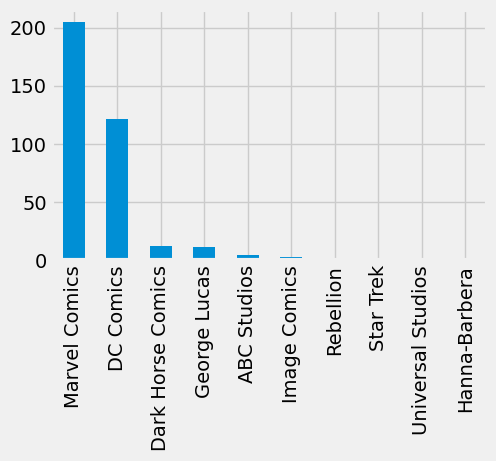

In [11]:
#visualizziamo i dati QUANTITATIVI con un grafico a barre
heroes_with_year['Publisher'].value_counts().plot.bar()
plt.show()

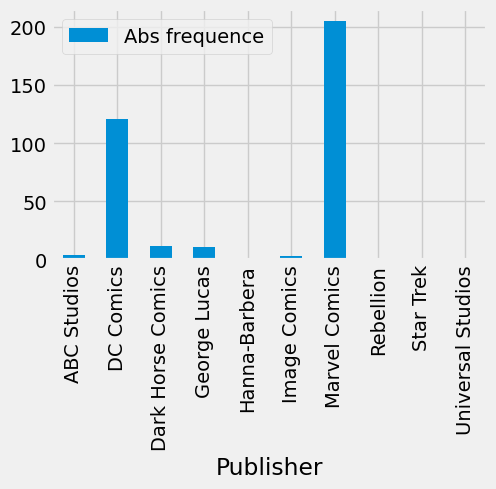

In [12]:
#oppure invocandolo sul df delle frequenze assolute
publisher_freq.plot.bar()
plt.show()
#quello precedente aveva le barre ordinate in modo decrescente, questo no

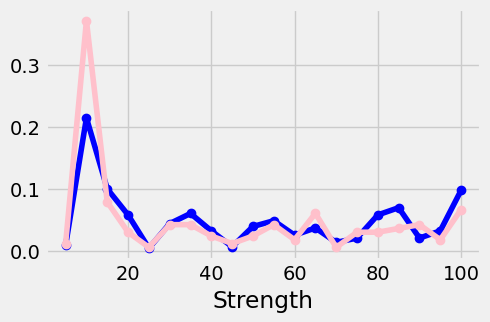

In [15]:
#grafico a barre per comparare due osservazioni diverse: non è quello migliore ma lo vediamo lo stesso
male_strength_freq = (pd.crosstab(index=heroes.loc[heroes['Gender'] == 'M',
                                                  'Strength'],
                                 columns = 'Rel. freq.',
                                 normalize = True)
                     .loc[:, 'Rel. freq.'])
male_strength_freq = male_strength_freq.reindex(heroes['Strength'].unique()).dropna().sort_index()

female_strength_freq = (pd.crosstab(index=heroes.loc[heroes['Gender'] == 'F',
                                                  'Strength'],
                                 columns = 'Rel. freq.',
                                 normalize = True)
                     .loc[:, 'Rel. freq.'])
female_strength_freq = female_strength_freq.reindex(heroes['Strength'].unique()).dropna().sort_index()

male_strength_freq.plot(marker = 'o', color = 'blue', legend = False)
female_strength_freq.plot(marker = 'o', color = 'pink', legend = False)
plt.show()

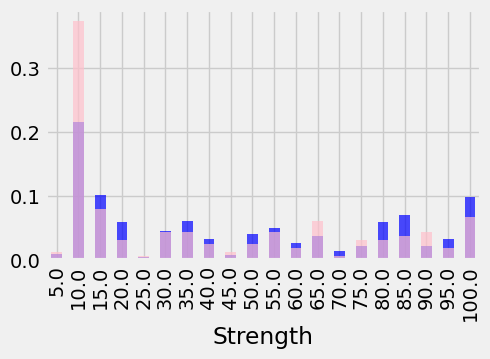

In [16]:
#effettivo grafico a barre, molto migliore del precedente
male_strength_freq.plot.bar(color = 'blue', alpha = .7)  #alpha = trasparenza barre
female_strength_freq.plot.bar(color='pink', alpha = .7)
plt.show()

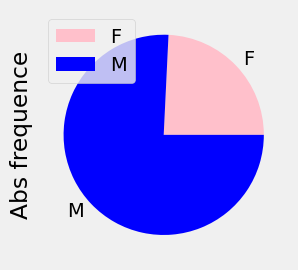

In [21]:
#grafico a torta
gender_freq = pd.crosstab(index = heroes_with_year['Gender'], 
                             columns = ['Abs frequence'], 
                             colnames = [''])
gender_freq.plot.pie(y='Abs frequence', colors = ['pink', 'blue'])
plt.show()

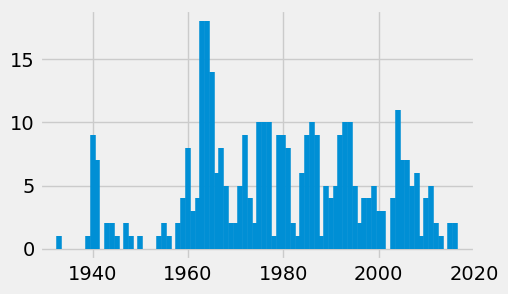

In [23]:
#grafico a bastoncini: ideale per collegare le frequenze a punti precisi dell'asse x, e non ad intervalli di valori
first_app_freq = pd.crosstab(index = heroes_with_year['First appearance'],
                            columns = ['Abs frequence'],
                            colnames = [''])
plt.vlines(first_app_freq.index, 0, first_app_freq.values)
plt.show()

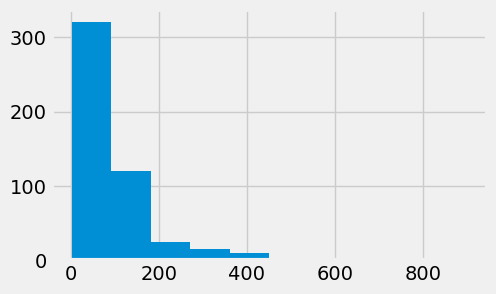

In [24]:
#istogramma: usato quando si hanno dati quantitativi per cui ha senso considerare frequenze di possibili intervalli di valori
heroes['Weight'].hist()
plt.show()

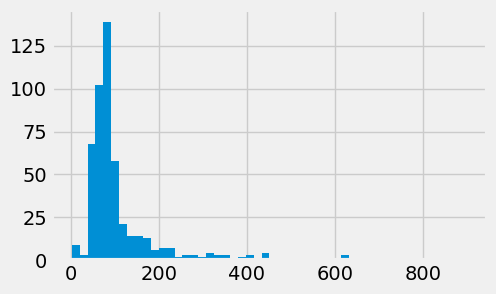

In [25]:
#argomento bins: divide l'intervallo di valori in sotto intervalli equiampi
heroes['Weight'].hist(bins=50)
plt.show()

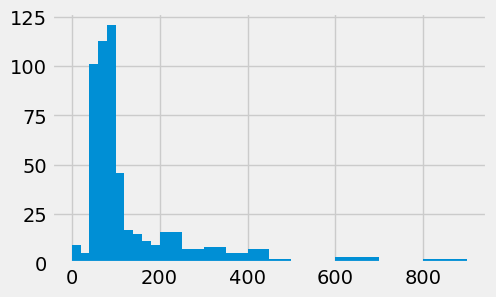

In [26]:
#grafichiamo meglio l'istogramma in base a quello che ci dice
heroes['Weight'].hist(bins = np.hstack((np.arange(0,200,20),
                                       np.arange(200,500,50),
                                       np.arange(500,1000,100))))
plt.show()

In [35]:
#FREQUENZE CUMULATE

In [34]:
first_app_freq_cumulate = (pd.crosstab(index=heroes_with_year['First appearance'],
                                      columns=['Cumulate freq'],
                                      colnames=[''])
                          .cumsum())
first_app_freq_cumulate.iloc[:10]

,Cumulate freq
First appearance,
1933.0,1
1939.0,2
1940.0,11
1941.0,18
1943.0,20
1944.0,22
1945.0,23
1947.0,25
1948.0,26


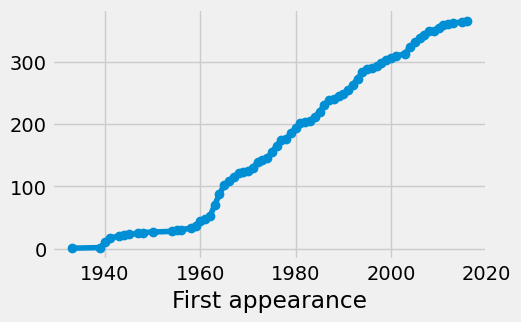

In [29]:
#grafichiamo le frequenze cumulate
first_app_freq_cumulate.plot(marker = 'o', legend  =False)
plt.show()

In [30]:
#calcolo delle frequenze cumulate relative
first_app_relfreq_cumulate = (pd.crosstab(index=heroes_with_year['First appearance'],
                                         columns=['Cumulate freq'],
                                         colnames = [''],
                                         normalize = True).cumsum())
first_app_relfreq_cumulate.iloc[:10]

,Cumulate freq
First appearance,
1933.0,0.002732
1939.0,0.005464
1940.0,0.030055
1941.0,0.049180
1943.0,0.054645
1944.0,0.060109
1945.0,0.062842
1947.0,0.068306
1948.0,0.071038


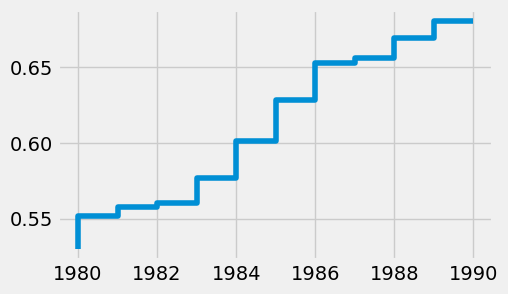

In [32]:
#funzione cumulativa empirica
ecdf = sm.distributions.ECDF(heroes_with_year['First appearance'])
x = np.arange(1980,1991)
y = ecdf(x)
plt.step(x,y)   #step = grafico a gradini
plt.show()

In [33]:
#FREQUENZE CONGIUNTE E MARGINALI

In [37]:
#tabella delle frequenze congiunte 
int_gender_freq = pd.crosstab(index=heroes['Intelligence'],
                             columns=heroes['Gender'])
int_gender_freq

Gender,F,M
Intelligence,,
average,38,101
good,78,165
high,27,112
low,0,13
moderate,21,37


In [38]:
#visualizzazione grafica delle frequenze congiunte

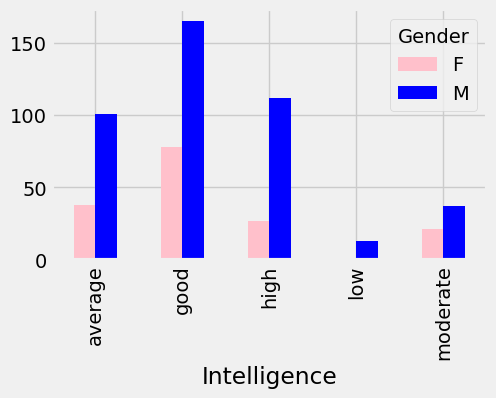

In [39]:
#tramite barre affiancate
int_gender_freq.plot.bar(color=['pink', 'blue'])
plt.show()

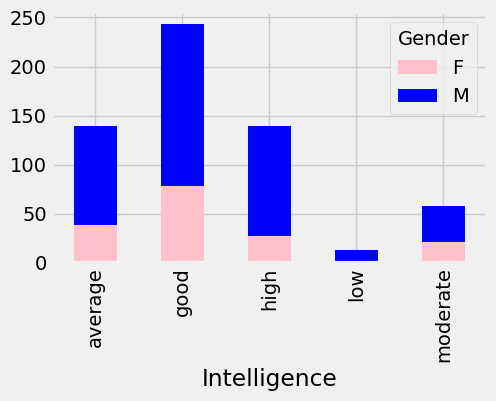

In [40]:
#tramite barre sovrapposte
int_gender_freq.plot.bar(color=['pink', 'blue'], stacked = True)
plt.show()

In [41]:
#frequenze congiunte raggruppate per intervalli
pd.crosstab(index = pd.cut(heroes['Weight'],
                          bins = [30,50,80,100,200,500,1000]),
           columns = [heroes['Gender']])

Gender,F,M
Weight,,
"(30, 50]",4,4
"(50, 80]",116,88
"(80, 100]",5,111
"(100, 200]",11,84
"(200, 500]",5,38
"(500, 1000]",1,5


In [42]:
#frequenze congiunte relative
pd.crosstab(index = heroes['Intelligence'],
           columns = heroes['Gender'],
           margins = True, 
           normalize = 'all')

Gender,F,M,All
Intelligence,,,
average,0.064189,0.170608,0.234797
good,0.131757,0.278716,0.410473
high,0.045608,0.189189,0.234797
low,0.000000,0.021959,0.021959
moderate,0.035473,0.062500,0.097973
All,0.277027,0.722973,1.000000


In [43]:
#DISPERSIONE DEI DATI

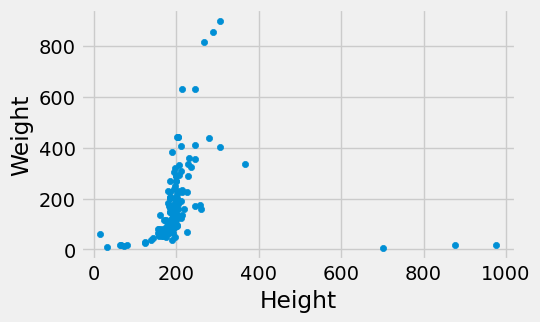

In base a come sono disposti le misurazioni dei due caratteri, potremo concludere se esiste o meno un qualche tipo di
relazione tra i due caratteri.


In [45]:
#diagramma di dispersione: permette di valutare l'esistenza di una relazione tra due caratteri
heroes[heroes['Gender'] == 'M'].plot.scatter('Height', 'Weight')
plt.show()
print('In base a come sono disposti le misurazioni dei due caratteri, potremo concludere se esiste o meno un qualche tipo di\nrelazione tra i due caratteri.')

In [50]:
#indice di covarianza
heroes_with_data = heroes[heroes['Gender'] == 'M'].copy().dropna()
heroes_with_data = heroes_with_data[heroes_with_data['Height']<300]
male_heroes = heroes_with_data[heroes_with_data['Gender'] == 'M']
male_heroes['Height'].cov(male_heroes['Weight'])

1817.2108845049506

In [58]:
#indice di correlazione campionaria
male_heroes['Height'].corr(male_heroes['Weight'])
print('L indice di correlazione campionaria ci aiuta a capire se esite o meno una relazione tra due caratteri: se tende ad 1\nvi sarà una relazione diretta, se tende a -1 sarà indiretta, altrimenti se è più vicina a 0 non esisterà alcuna relazione.\n')
print('In questo caso l indice di correlazione è tendente ad 1, il che suggerisce una relazione di tipo diretto tra peso e altezza\ndei supereroi, come si poteva già vedere dallo scatter plot -> l indice di correlazione permette di confermare o meno\nl ipotesi fatta sulla dispersione osservando lo scatter plot.')

L indice di correlazione campionaria ci aiuta a capire se esite o meno una relazione tra due caratteri: se tende ad 1
vi sarà una relazione diretta, se tende a -1 sarà indiretta, altrimenti se è più vicina a 0 non esisterà alcuna relazione.

In questo caso l indice di correlazione è tendente ad 1, il che suggerisce una relazione di tipo diretto tra peso e altezza
dei supereroi, come si poteva già vedere dallo scatter plot -> l indice di correlazione permette di confermare o meno
l ipotesi fatta sulla dispersione osservando lo scatter plot.
